Realizar um projeto utilizando um dos modelos apresentados na disciplina. O Trabalho pode ser feito em grupo com número máximo de 2 alunos por grupo.

1 ) Acessar o https://www.kaggle.com/
2) Selecionar a base de escolha e que se adeque ao modelo.
3) Contextualizar o problema a ser resolvido.
4) processamento de dados
5) Analise de variáveis - análise descritiva
6) análise de correlação
7) validação de pressupostos
8) rodar o modelo 
9) interpretação da saída (métricas de avaliação e coeficientes)
Entregar o notebook (em python ou r com as saídas comentadas com a sua interpretação) + a base de dados utilizada. 

O conjunto de dados consiste em preços de imóveis no Condado de King, uma área no estado americano de Washington. Esses dados também abrangem Seattle.
A base consistiu em 21 variáveis e 21.613 observações.

Importação das libs utilizadas

In [37]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

Carregamento da base de dados

In [38]:
print("Carregando dados")
df = pd.read_csv(
    'kc_house_data.csv', 
    sep=','      
)

df.head()

Carregando dados


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [39]:
print(df.dtypes)
df.describe()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Validação da Remoção da Variavel do tamanho do lot

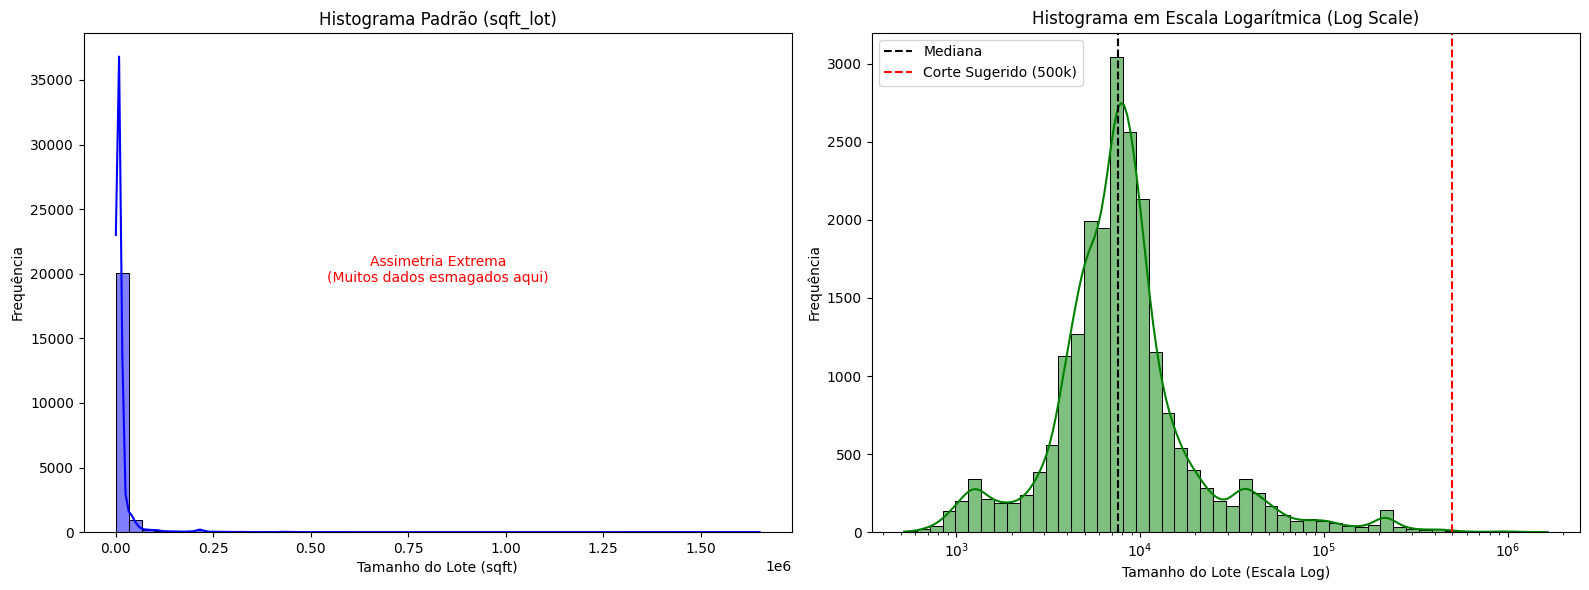

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df['sqft_lot'], bins=50, kde=True, ax=ax[0], color='blue')
ax[0].set_title('Histograma Padrão (sqft_lot)')
ax[0].set_xlabel('Tamanho do Lote (sqft)')
ax[0].set_ylabel('Frequência')
ax[0].text(0.5, 0.5, 'Assimetria Extrema\n(Muitos dados esmagados aqui)', 
           transform=ax[0].transAxes, ha='center', color='red')

sns.histplot(df['sqft_lot'], bins=50, kde=True, ax=ax[1], color='green', log_scale=True)
ax[1].set_title('Histograma em Escala Logarítmica (Log Scale)')
ax[1].set_xlabel('Tamanho do Lote (Escala Log)')
ax[1].set_ylabel('Frequência')

ax[1].axvline(df['sqft_lot'].median(), color='black', linestyle='--', label='Mediana')
ax[1].axvline(500000, color='red', linestyle='--', label='Corte Sugerido (500k)')
ax[1].legend()

plt.tight_layout()
plt.show()

## TRATAMENTO DE DADOS INICIAL ##

-> Remoção de outliers, temos terrenos com 33 quartos, em uma média de 3
-> Alguns terrenos não possuem quartos nem banheiros, tornando-se um erro
-> Além disso, temos terrenos absurdamente grandes, o que pode indicar um erro
-> id é irrelevante
-> Muito mais importante que a data de construção da casa, é o intervalo de tempo entre a data de construção e a data atual
-> indicação de reforma na casa para a variável was_renovated
-> Normalização da váriavel price, que possui uma assimetria a direita nos dados, ao aplicar a transformação logaritimitca, os dados se aproximam da dostribuição normal

Linhas removidas: 38

Novas estatísticas de Quartos:
count    21575.000000
mean         3.372005
std          0.903940
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


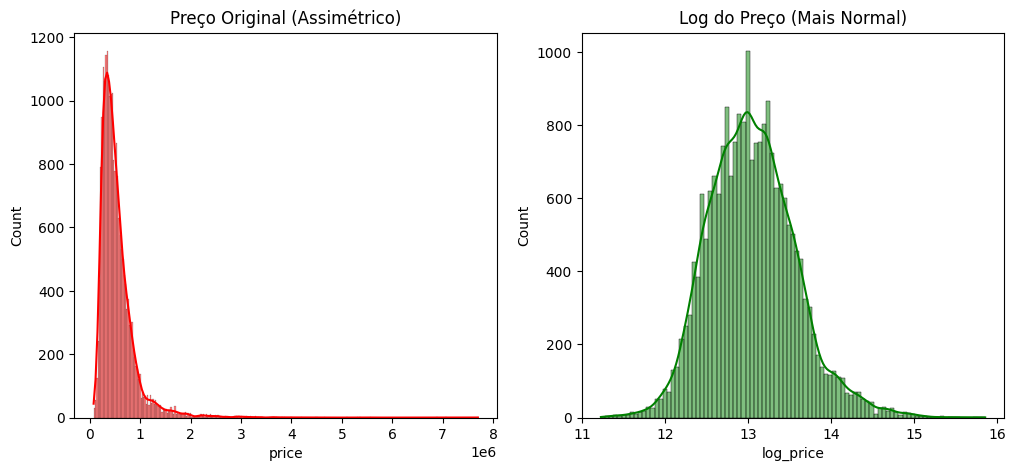

In [42]:
df_clean = df[df['bedrooms'] < 15]

df_clean = df_clean[df_clean['bedrooms'] > 0]
df_clean = df_clean[df_clean['bathrooms'] > 0]


df_clean = df_clean[df_clean['sqft_lot'] < 500000]

rows_removed = df.shape[0] - df_clean.shape[0]
print(f"Linhas removidas: {rows_removed}")
print("\nNovas estatísticas de Quartos:")
print(df_clean['bedrooms'].describe())

if 'id' in df.columns:
    df = df.drop('id', axis=1)

# Conversão da coluna de data
df['date'] = pd.to_datetime(df['date'])

# Calculo da 'idade' da casa
df['house_age'] = df['date'].dt.year - df['yr_built']

df['was_renovated'] = (df['yr_renovated'] != 0).astype(int)

df['log_price'] = np.log(df['price'])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['price'], kde=True, ax=ax[0], color='red').set_title('Preço Original (Assimétrico)')
sns.histplot(df['log_price'], kde=True, ax=ax[1], color='green').set_title('Log do Preço (Mais Normal)')
plt.show()

## COLETA DA AMOSTRA ##

Pelo tamanho do dataframe, com 21000 registros aproximadamente, nós poderiamos usar a base completa para treinar o modelo, mas para fins de estudo, vamos realizar uma amostra estratificada sobre a variável grade

A variável grade é a avaliação ou "nota" da casa
Como algumas notas possuem poucos dados, como por exemplo, 12, 4 e 13, se realizarmos uma amostra aleatória simples, pode-se ocorrer o viés de seleção

Por que escolher a variável grade e não outras como o zipcode ou bedrooms?
Pois ela possui a melhor correlação com a nossa variável preço. Então é muito importante que o modelo aprenda sobre essa variável.

In [ ]:
from sklearn.model_selection import train_test_split

grade_counts = df['grade'].value_counts()
print("Distribuição de Grades Original:")
print(grade_counts)
rare_grades = grade_counts[grade_counts < 2].index
print(f"\nGrades raras removidas: {list(rare_grades)}")

# Manter apenas linhas com grades frequentes
df_clean_grades = df[~df['grade'].isin(rare_grades)].copy()

# mostragem Estratificada
SAMPLE_SIZE = 1500
SEED = 42

df_amostra, _ = train_test_split(
    df_clean_grades, 
    train_size=SAMPLE_SIZE, 
    stratify=df_clean_grades['grade'], 
    random_state=SEED
)

print(f"\nTamanho da Amostra Gerada: {df_amostra.shape[0]}")

Distribuição de Grades Original:
grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

Grades raras removidas: [1]

Tamanho da Amostra Gerada: 2000


Além da verificação da variável grade usando Pearson, podemos verificar que se faz necessário a remoção de algumas variáveis

    'sqft_above',    # Altamente correlacionada com sqft_living (0.88) Área construída acima do nível do solo (exclui o porão).
    'sqft_lot15',    # Altamente correlacionada com sqft_lot (0.80) Área do Terreno dos 15 vizinhos mais próximos
    'yr_built',      # Redundante com house_age (-1.0)
    'sqft_living15', # Redundante com sqft_living (0.73) Área Útil ou Área Construída interna
    'price',         # Alvo original (já temos log_price)
    'zipcode'        # Variável nominal tratada como numérica (ruído)

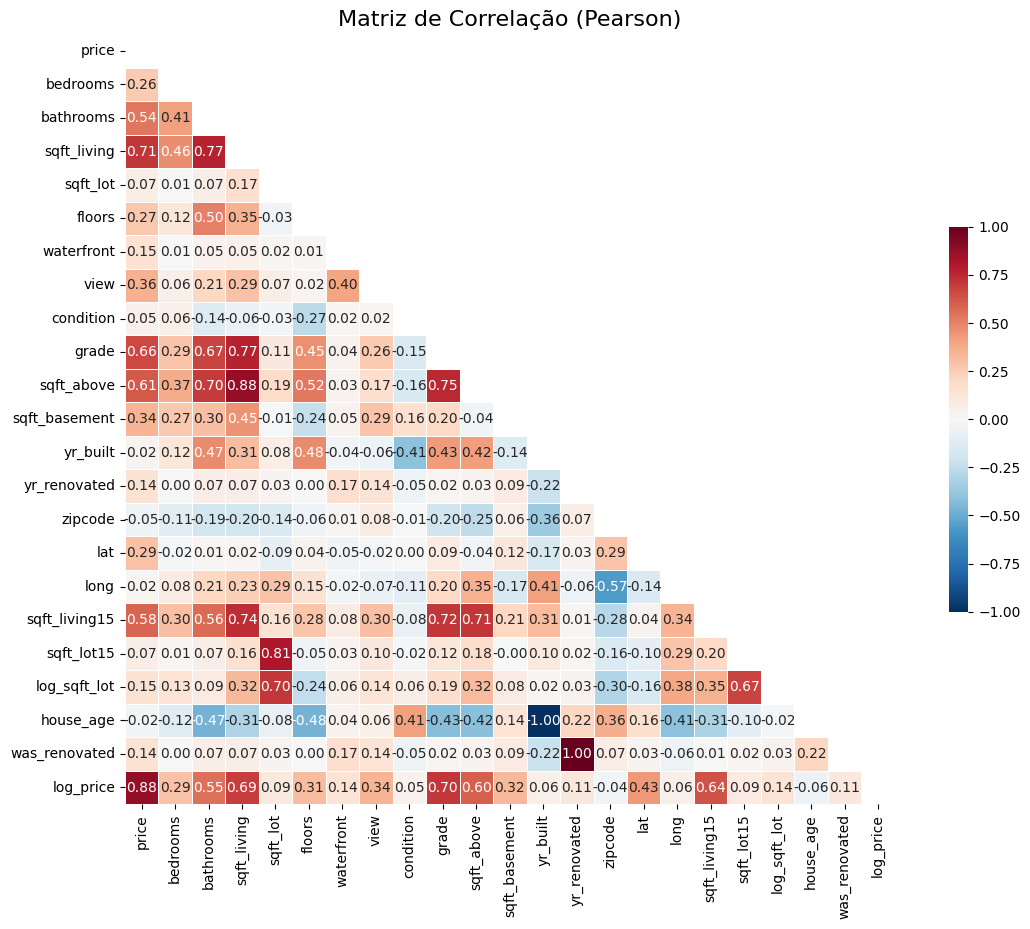

--- Top 10 Variáveis mais correlacionadas com Log Price ---
price            0.880724
grade            0.703342
sqft_living      0.691894
sqft_living15    0.638282
sqft_above       0.601054
bathrooms        0.553426
lat              0.429702
view             0.342479
sqft_basement    0.320835
floors           0.307052
Name: log_price, dtype: float64


In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df_amostra.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df_amostra[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True,              
    fmt=".2f",              
    cmap='RdBu_r',           
    vmax=1, vmin=-1,
    center=0,             
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .5}
)

plt.title('Matriz de Correlação (Pearson)', fontsize=16)
plt.show()

target_corr = corr_matrix['log_price'].drop('log_price') 
top_features = target_corr.abs().sort_values(ascending=False).head(10)

print("--- Top 10 Variáveis mais correlacionadas com Log Price ---")
print(top_features)

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

vars_to_drop = [
    'sqft_above',    # Altamente correlacionada com sqft_living (0.88) Área construída acima do nível do solo (exclui o porão).
    'sqft_lot15',    # Altamente correlacionada com sqft_lot (0.80) Área do Terreno dos 15 vizinhos mais próximos
    'yr_built',      # Redundante com house_age (-1.0)
    'sqft_living15', # Redundante com sqft_living (0.73) Área Útil ou Área Construída interna
    'price',         # Alvo original (já temos log_price)
    'zipcode'       # Variável nominal tratada como numérica (ruído)

]


df_final = df_amostra.drop(columns=vars_to_drop, errors='ignore')

print(f"Variáveis restantes para o modelo: \n{df_final.columns.tolist()}")

X_final = df_final.drop('log_price', axis=1)
X_final = sm.add_constant(X_final)
y_final = df_final['log_price']


Variáveis restantes para o modelo: 
['date', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'log_sqft_lot', 'house_age', 'was_renovated', 'log_price']


## RESULTADOS DO MODELO ##

Ao rodarmos o primeiro treinamento, apesar do R2 = 76.3%, varificamos uma multicolinearidade altissima, isso se da pela mistura de numeros grandes com numeros pequenos, para corrigir isso, podemos usar o StandardScaler, e ao padronizar o modelo obtemos os seguintes resultados


StandardScaler -> Ao padronizar os dados, pedemos verificar que o grade tem a maior importancia no modelo
Teste de Hipótese -> Podemos verificar que a variável bathrooms é irrelevante para o modelo, possivelmente obteremos um modelo melhor ao retira-la, o que reduzira o AIC e o BIC

Resultado Final:

Podemos verificar os seguintes pontos
R2 -> O modelo explica 76% das variações do modelo.
AIC de 208.0 -> Números baixos indicam um bom equilíbrio entre erro e simplicidade.
bedrooms: O Coeficiente é 0.0016 e o P-valor (P>|t|) é 0.850. Isso prova estatisticamente que a quantidade de quartos é irrelevante para o preço final neste modelo.
grade (0.2121) e sqft_living (0.1787) têm os maiores coeficientes e P-valor 0.000. Eles mandam no preço.
O histograma de residuos confirma que o modelo não é viciado.

Ponto importante:
O modelo subestima casas com valores altos.

Considerando esses pontos, podemos afirmar que temos um modelo preditivo funcional.

In [46]:
import numpy as np

X_numeric = X_final.select_dtypes(include=[np.number])

bool_cols = X_final.select_dtypes(include=['bool']).columns
if len(bool_cols) > 0:
    for col in bool_cols:
        X_numeric[col] = X_numeric[col].astype(int)

if X_numeric.isnull().values.any():
    X_numeric = X_numeric.fillna(X_numeric.median())


cols_to_exclude = ['zipcode']
X_numeric = X_numeric.drop(columns=[c for c in cols_to_exclude if c in X_numeric.columns], errors='ignore')

import statsmodels.api as sm
X_ready = sm.add_constant(X_numeric)

# Ajuste do Modelo
model_final = sm.OLS(y_final, X_ready).fit()

# Resultados
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     415.8
Date:                Sun, 14 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:33:23   Log-Likelihood:                -130.11
No. Observations:                2000   AIC:                             292.2
Df Residuals:                    1984   BIC:                             381.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -46.1657      6.696     -6.895

In [47]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_ready.columns

vif_data["VIF"] = [variance_inflation_factor(X_ready.values, i) 
                   for i in range(len(X_ready.columns))]

print("--- Tabela de Multicolinearidade (VIF) ---")
print(vif_data.sort_values('VIF', ascending=False))

--- Tabela de Multicolinearidade (VIF) ---
          Feature           VIF
0           const  1.333892e+06
15  was_renovated  1.425073e+04
10   yr_renovated  1.424910e+04
3     sqft_living  5.573973e+00
2       bathrooms  3.420557e+00
8           grade  3.102380e+00
14      house_age  2.354466e+00
4          floors  2.331359e+00
9   sqft_basement  2.086217e+00
13   log_sqft_lot  1.759576e+00
12           long  1.550403e+00
6            view  1.430404e+00
1        bedrooms  1.346826e+00
7       condition  1.299205e+00
5      waterfront  1.228070e+00
11            lat  1.141379e+00


In [48]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

cols_to_drop_final = ['yr_renovated'] 
X_raw = X_numeric.drop(columns=[c for c in cols_to_drop_final if c in X_numeric.columns], errors='ignore')

X_vars = X_raw.drop('const', axis=1, errors='ignore')

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_vars)
X_scaled = pd.DataFrame(X_scaled_array, columns=X_vars.columns, index=X_vars.index)

X_final_scaled = sm.add_constant(X_scaled)

model_scaled = sm.OLS(y_final, X_final_scaled).fit()

print(model_scaled.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     441.5
Date:                Sun, 14 Dec 2025   Prob (F-statistic):               0.00
Time:                        20:33:23   Log-Likelihood:                -137.25
No. Observations:                2000   AIC:                             304.5
Df Residuals:                    1985   BIC:                             388.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.0538      0.006   2244.142

In [49]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_final_scaled.columns

vif_data["VIF"] = [variance_inflation_factor(X_final_scaled.values, i) 
                   for i in range(len(X_final_scaled.columns))]

print("--- Tabela de Multicolinearidade (VIF) - Dados Padronizados ---")
print(vif_data.sort_values('VIF', ascending=False))

--- Tabela de Multicolinearidade (VIF) - Dados Padronizados ---
          Feature       VIF
3     sqft_living  5.573779
2       bathrooms  3.419636
8           grade  3.102010
13      house_age  2.352423
4          floors  2.331102
9   sqft_basement  2.081246
12   log_sqft_lot  1.758939
11           long  1.549965
6            view  1.429684
1        bedrooms  1.342982
7       condition  1.293364
5      waterfront  1.225544
14  was_renovated  1.165743
10            lat  1.140981
0           const  1.000000


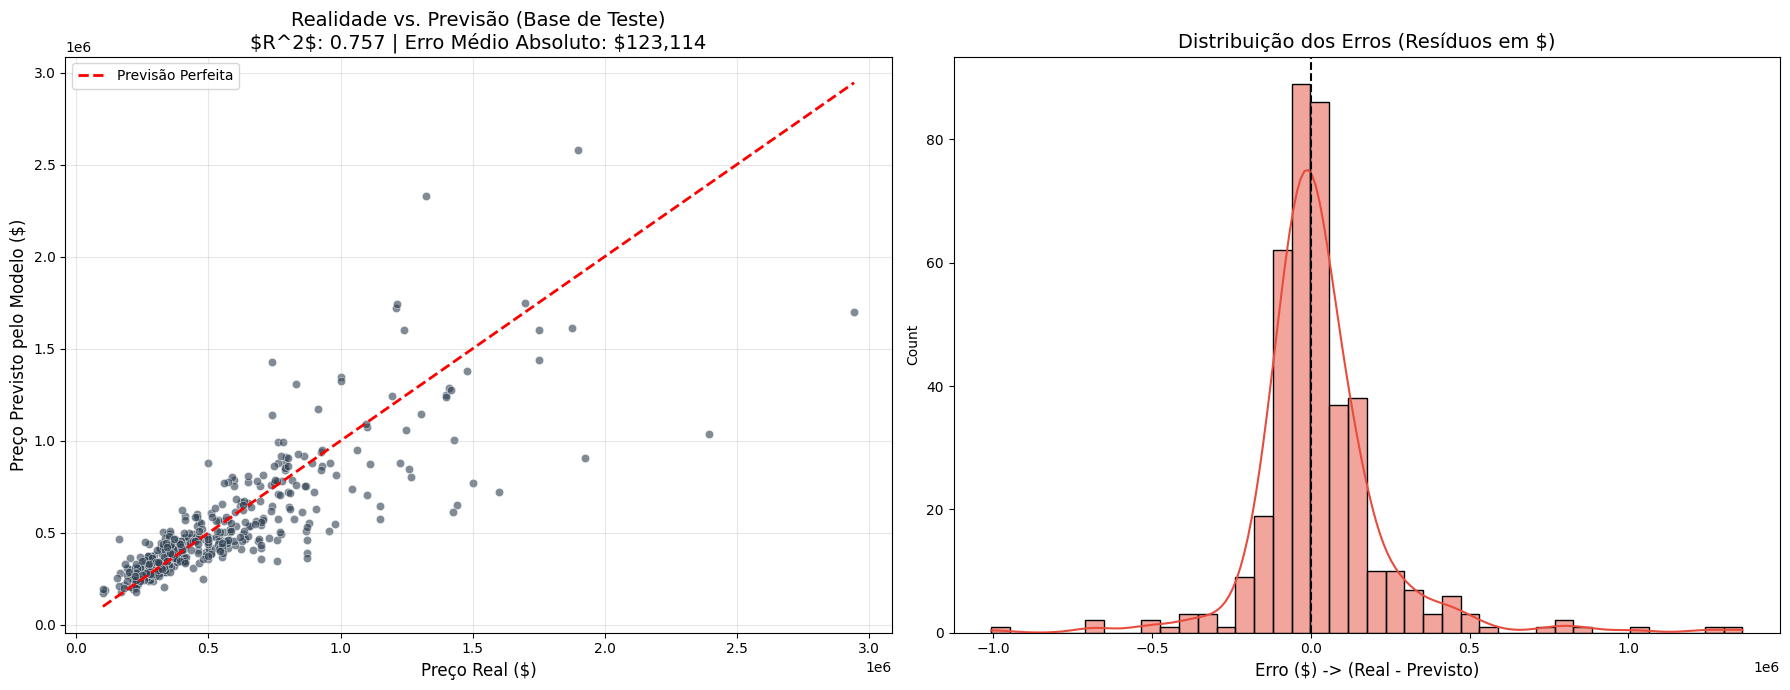

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(
    X_final_scaled, y_final, test_size=0.2, random_state=42
)

model_viz = sm.OLS(y_train, X_train).fit()
y_pred_log = model_viz.predict(X_test)

y_test_dollars = np.exp(y_test)
y_pred_dollars = np.exp(y_pred_log)

r2 = r2_score(y_test, y_pred_log)
mae = mean_absolute_error(y_test_dollars, y_pred_dollars)

fig, ax = plt.subplots(1, 2, figsize=(18, 7))

sns.scatterplot(x=y_test_dollars, y=y_pred_dollars, alpha=0.6, color='#2c3e50', ax=ax[0])

max_val = max(y_test_dollars.max(), y_pred_dollars.max())
min_val = min(y_test_dollars.min(), y_pred_dollars.min())
ax[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Previsão Perfeita')

ax[0].set_title(f'Realidade vs. Previsão (Base de Teste)\n$R^2$: {r2:.3f} | Erro Médio Absoluto: ${mae:,.0f}', fontsize=14)
ax[0].set_xlabel('Preço Real ($)', fontsize=12)
ax[0].set_ylabel('Preço Previsto pelo Modelo ($)', fontsize=12)
ax[0].legend()
ax[0].grid(True, alpha=0.3)


residuos = y_test_dollars - y_pred_dollars
sns.histplot(residuos, kde=True, color='#e74c3c', ax=ax[1])
ax[1].axvline(0, color='black', linestyle='--')
ax[1].set_title('Distribuição dos Erros (Resíduos em $)', fontsize=14)
ax[1].set_xlabel('Erro ($) -> (Real - Previsto)', fontsize=12)

plt.tight_layout()
plt.show()